🔹 Original DataFrame:
     ID     Name Age JoiningDate Salary
0  101    Alice  25  2022-01-10  50000
1  102      Bob  30  2022-03-15  60000
2  103  Charlie  35  2022-03-15  70000
3  104    David  40  2022-05-20  80000
4  105      Eve  45  2022-07-25  90000
5  105      Eve  45  2022-07-25  90000

🔹 Number of Duplicate Rows: 1

✅ DataFrame After Removing Duplicates:
     ID     Name Age JoiningDate Salary
0  101    Alice  25  2022-01-10  50000
1  102      Bob  30  2022-03-15  60000
2  103  Charlie  35  2022-03-15  70000
3  104    David  40  2022-05-20  80000
4  105      Eve  45  2022-07-25  90000

📌 Data Types Before Fix:
 ID              int64
Name           object
Age            object
JoiningDate    object
Salary         object
dtype: object

✅ Data Types After Fix:
 ID                      int64
Name                   object
Age                     int64
JoiningDate    datetime64[ns]
Salary                  int64
dtype: object


/tmp/ipykernel_3729/2383713861.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Age'] = pd.to_numeric(df_no_duplicates['Age'], errors='coerce')
/tmp/ipykernel_3729/2383713861.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Salary'] = pd.to_numeric(df_no_duplicates['Salary'], errors='coerce')
/tmp/ipykernel_3729/2383713861.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

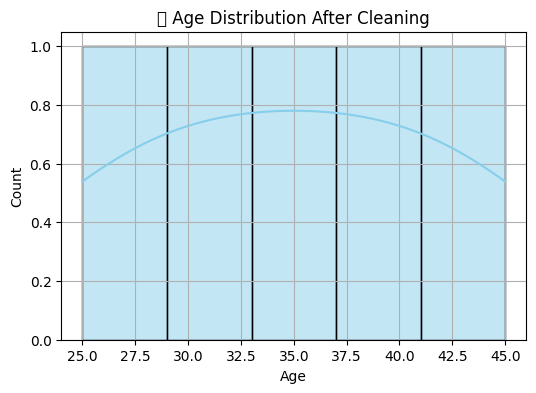


🧹 Final Cleaned DataFrame:
     ID     Name  Age JoiningDate  Salary
0  101    Alice   25  2022-01-10   50000
1  102      Bob   30  2022-03-15   60000
2  103  Charlie   35  2022-03-15   70000
3  104    David   40  2022-05-20   80000
4  105      Eve   45  2022-07-25   90000

📊 Summary Report:
Initial Rows: 6
After Duplicate Removal: 5
Missing Values After Type Fix:
ID             0
Name           0
Age            0
JoiningDate    0
Salary         0
dtype: int64


In [1]:
# Part 2: Remove Duplicates & Fix Data Types

# Task 1: Remove Duplicates
#     1. Load Extended Data:
#     2. Remove Duplicates:
        


# Task 2: Fix Data Types
#     1. Fix Incorrect Data Types:
        


# Task 3: Convert Data Type for Analysis
#     1. Convert Date Strings to DateTime:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Step 1: Load Extended Data (Simulated)
# ----------------------------
data = {
    'ID': [101, 102, 103, 104, 105, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Eve'],
    'Age': ['25', '30', '35', '40', '45', '45'],  # stored as strings
    'JoiningDate': ['2022-01-10', '2022-03-15', '2022-03-15', '2022-05-20', '2022-07-25', '2022-07-25'],
    'Salary': ['50000', '60000', '70000', '80000', '90000', '90000']  # string instead of numeric
}

df = pd.DataFrame(data)
print("🔹 Original DataFrame:\n", df)

# ----------------------------
# Step 2: Detect & Remove Duplicates
# ----------------------------
print("\n🔹 Number of Duplicate Rows:", df.duplicated().sum())

# Remove complete duplicate rows
df_no_duplicates = df.drop_duplicates()
print("\n✅ DataFrame After Removing Duplicates:\n", df_no_duplicates)

# ----------------------------
# Step 3: Fix Incorrect Data Types
# ----------------------------

# Before fixing
print("\n📌 Data Types Before Fix:\n", df_no_duplicates.dtypes)

# Convert 'Age' and 'Salary' from string to numeric
df_no_duplicates['Age'] = pd.to_numeric(df_no_duplicates['Age'], errors='coerce')
df_no_duplicates['Salary'] = pd.to_numeric(df_no_duplicates['Salary'], errors='coerce')

# Convert 'JoiningDate' to datetime
df_no_duplicates['JoiningDate'] = pd.to_datetime(df_no_duplicates['JoiningDate'], errors='coerce')

# After fixing
print("\n✅ Data Types After Fix:\n", df_no_duplicates.dtypes)

# ----------------------------
# Step 4: Visualize Cleaned Data
# ----------------------------
plt.figure(figsize=(6, 4))
sns.histplot(df_no_duplicates['Age'], bins=5, kde=True, color='skyblue')
plt.title("📊 Age Distribution After Cleaning")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# ----------------------------
# Step 5: Final Cleaned Output
# ----------------------------
print("\n🧹 Final Cleaned DataFrame:\n", df_no_duplicates)

# ----------------------------
# Step 6: Summary Report
# ----------------------------
print("\n📊 Summary Report:")
print(f"Initial Rows: {len(df)}")
print(f"After Duplicate Removal: {len(df_no_duplicates)}")
print(f"Missing Values After Type Fix:\n{df_no_duplicates.isnull().sum()}")